# Hotdog-OR-Not-Hotdog

<br>

<img src='https://miro.medium.com/max/650/1*ubJ-RF8CKGvjckDEICsxsQ.png'>

<br>

<blockquote style='text-align: left;'>"What would you say if I told you there is a app on the market that tell you if you have a hotdog or not a hotdog?"  -Jian-YangNot-Hot-Dog</blockquote>
 
<br>

This is a deep learning model code to train a model to classify hot dog images from not hot dog image based on the populer TV series silicon valley scence.
watch freom here: https://www.youtube.com/watch?v=pqTntG1RXSY&feature=youtu.be

<br>

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

## Load data

In [2]:
image_width, image_height = 150, 150

train_datagen = ImageDataGenerator(
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
                    "../dataset/train/",
                    batch_size=128,
                    class_mode='binary',
                    shuffle=True,
                    target_size=(image_width, image_height)
)     

test_generator =  test_datagen.flow_from_directory(
                    "../dataset/test/",
                    batch_size=128,
                    class_mode='binary',
                    shuffle=True,
                    target_size=(image_width, image_height)
)

Found 2000 images belonging to 2 classes.
Found 785 images belonging to 2 classes.


In [3]:
train_steps = train_generator.n // train_generator.batch_size
test_steps = test_generator.n // test_generator.batch_size
print(train_steps)
print(test_steps)

15
6


## Fine Tuning with VGG16 Model

In [4]:
vgg_conv = VGG19(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

In [5]:
for layers in (vgg_conv.layers)[:-4]:
    layers.trainable = False

In [6]:
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())

model.add(Dense(64, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524288    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [7]:
model.compile(loss='binary_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

## Train model

In [8]:
checkpointer = ModelCheckpoint(filepath='vgg_model.h5', verbose=1, save_best_only=True)

In [9]:
# model = load_model('vgg_model.h5')

In [10]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=100,
        validation_data=test_generator,
        validation_steps=test_steps,
        verbose=1,
        callbacks=[checkpointer])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 6 steps
Epoch 1/100
14/15 [===========================>..] - ETA: 1s - loss: 0.7569 - accuracy: 0.5344
Epoch 00001: val_loss improved from inf to 0.83956, saving model to vgg_model.h5
15/15 [==============================] - 30s 2s/step - loss: 0.7516 - accuracy: 0.5347 - val_loss: 0.8396 - val_accuracy: 0.6393
Epoch 2/100
14/15 [===========================>..] - ETA: 0s - loss: 0.6378 - accuracy: 0.6445
Epoch 00002: val_loss improved from 0.83956 to 0.62308, saving model to vgg_model.h5
15/15 [==============================] - 17s 1s/step - loss: 0.6369 - accuracy: 0.6474 - val_loss: 0.6231 - val_accuracy: 0.7083
Epoch 3/100
14/15 [===========================>..] - ETA: 0s - loss: 0.5728 - accuracy: 0.7070
Epoch 00003: val_loss improved from 0.62308 to 0.56116, saving model to vgg_model.h5
15/15 [==============================] - 18s 1s/step - loss: 0.5675 - accuracy: 0.7105 - val_loss: 0.5612 - val_acc

Epoch 28/100
14/15 [===========================>..] - ETA: 0s - loss: 0.2588 - accuracy: 0.8923
Epoch 00028: val_loss improved from 0.28291 to 0.28201, saving model to vgg_model.h5
15/15 [==============================] - 20s 1s/step - loss: 0.2567 - accuracy: 0.8943 - val_loss: 0.2820 - val_accuracy: 0.8893
Epoch 29/100
14/15 [===========================>..] - ETA: 0s - loss: 0.2426 - accuracy: 0.9054
Epoch 00029: val_loss improved from 0.28201 to 0.28062, saving model to vgg_model.h5
15/15 [==============================] - 20s 1s/step - loss: 0.2408 - accuracy: 0.9054 - val_loss: 0.2806 - val_accuracy: 0.8932
Epoch 30/100
14/15 [===========================>..] - ETA: 0s - loss: 0.2485 - accuracy: 0.8979
Epoch 00030: val_loss did not improve from 0.28062
15/15 [==============================] - 17s 1s/step - loss: 0.2508 - accuracy: 0.8974 - val_loss: 0.2817 - val_accuracy: 0.8893
Epoch 31/100
14/15 [===========================>..] - ETA: 0s - loss: 0.2303 - accuracy: 0.9025
Epoch 00

Epoch 57/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1807 - accuracy: 0.9318
Epoch 00057: val_loss did not improve from 0.26208
15/15 [==============================] - 17s 1s/step - loss: 0.1802 - accuracy: 0.9316 - val_loss: 0.2668 - val_accuracy: 0.8958
Epoch 58/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1726 - accuracy: 0.9392
Epoch 00058: val_loss did not improve from 0.26208
15/15 [==============================] - 17s 1s/step - loss: 0.1752 - accuracy: 0.9375 - val_loss: 0.2666 - val_accuracy: 0.8997
Epoch 59/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1810 - accuracy: 0.9329
Epoch 00059: val_loss did not improve from 0.26208
15/15 [==============================] - 17s 1s/step - loss: 0.1802 - accuracy: 0.9338 - val_loss: 0.2699 - val_accuracy: 0.8971
Epoch 60/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1595 - accuracy: 0.9455
Epoch 00060: val_loss did not improve from 0.26208
15/15 [==================

14/15 [===========================>..] - ETA: 0s - loss: 0.1203 - accuracy: 0.9639
Epoch 00086: val_loss did not improve from 0.25698
15/15 [==============================] - 14s 960ms/step - loss: 0.1210 - accuracy: 0.9631 - val_loss: 0.2682 - val_accuracy: 0.9010
Epoch 87/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1229 - accuracy: 0.9587
Epoch 00087: val_loss did not improve from 0.25698
15/15 [==============================] - 14s 955ms/step - loss: 0.1242 - accuracy: 0.9573 - val_loss: 0.2615 - val_accuracy: 0.9010
Epoch 88/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1426 - accuracy: 0.9450
Epoch 00088: val_loss did not improve from 0.25698
15/15 [==============================] - 14s 962ms/step - loss: 0.1408 - accuracy: 0.9466 - val_loss: 0.2658 - val_accuracy: 0.8984
Epoch 89/100
14/15 [===========================>..] - ETA: 0s - loss: 0.1309 - accuracy: 0.9581
Epoch 00089: val_loss did not improve from 0.25698
15/15 [======================

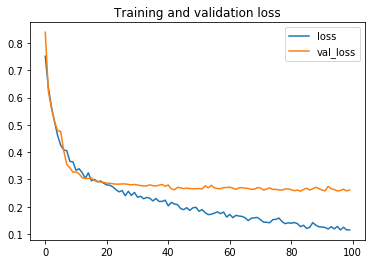

In [11]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and validation loss')
plt.legend()

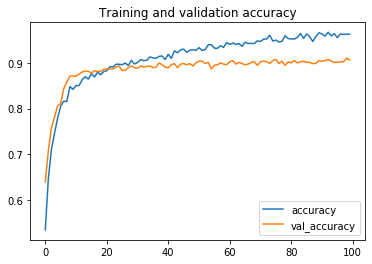

In [12]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()

## Test model

In [13]:
model.evaluate(test_generator, verbose=1, steps=test_steps)

  ...
    to  
  ['...']
6/6 [==============================] - 3s 581ms/step - loss: 0.2616 - accuracy: 0.9062


[0.2615804026524226, 0.90625]

In [14]:
train_generator.class_indices

{'hot dog': 0, 'not hot dog': 1}

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

image_width, image_height = 150, 150

img = image.load_img('new_test_images/4.jpg', target_size=(image_width, image_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img = preprocess_input(img)
model = load_model('vgg_model.h5')
model.predict_classes(img)

array([[1]])

## Save model

In [16]:
model.save('vgg_model.h5')